In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt 
%matplotlib inline
from skimage.transform import rescale, resize, downscale_local_mean
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
epoch_size = 20
num_batch_training = 73
learning_rate_single = 0.0001
learning_rate_multi = 0.01
learning_rate_conv = 0.0001
n_input = 800
n_classes = 2
n_hidden_1 = 512
n_hidden_2 = 256
n_hidden_3 = 128
n_hidden_4 = 64
n_hidden_5 = 32
n_hidden_6 = 8
n_hidden_7 = 4
num_networks = 5
beta = 0.0001
filter_number = 64

In [3]:
#Changing the working directory
os.chdir('/Users/nikhilkayal/Desktop/Machine Learning 2/Midterm Project/training_demo/')

# Data Preprocessing

In [10]:
training_image = open("imgs-train.txt","r")
training_bbs = open("bbs-train.txt","r")
training_list = open("list-train.txt","r")
training_label = open("label-train.txt","r")

In [5]:
#Converting the labels into dataframe
training_label = pd.read_table(training_label, sep = '   ', engine = 'python', header=None, index_col=False)
training_label.columns = ['Series No.', 'label']
training_label.drop('Series No.', axis = 1, inplace=True)

In [8]:
#Converting the bounding box image data into a dataframe
training_bbs = pd.read_table(training_bbs, sep = ' ', engine = 'python', header=None, index_col=False)

ValueError: Invalid file path or buffer object type: <class 'pandas.core.frame.DataFrame'>

/Users/nikhilkayal/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app


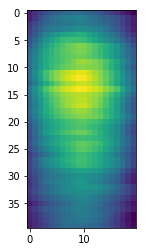

In [7]:
#Original Bounding Box Image
plt.imshow(training_bbs.iloc[2678,:].reshape(40, 20))

/Users/nikhilkayal/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app


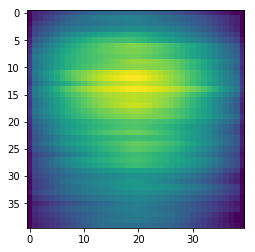

In [8]:
#Squared bounding box image we will be working on while using CNN
plt.imshow(resize((training_bbs.iloc[2678,:].reshape(40, 20)), (40, 40)))

In [9]:
#Concatenating all the dataframes together to form one single dataframe using less images for bad images. Total size 2928 
data_final = pd.concat([training_bbs, training_label], axis = 1)
bad_data = data_final.loc[data_final['label'] == 0]
bad_data_sample = bad_data.sample(frac=0.475)
good_data = data_final.loc[data_final['label'] == 1]
data_final = pd.concat([bad_data_sample, good_data], axis=0)
data_final = data_final.sample(frac=1).reset_index(drop=True)
one_hot_encoding = pd.get_dummies(data_final['label'])
data_final = data_final.drop('label', axis=1)
data_final_less_equal_images = pd.concat([data_final, one_hot_encoding], axis=1)

### Single Layer NN

Started Training...
Loss Value:  30.5804
Accuracy on Test Set after 0 Epochs:  0.503413
Loss Value:  30.5768
Accuracy on Test Set after 4 Epochs:  0.503413
Loss Value:  30.5733
Accuracy on Test Set after 8 Epochs:  0.503413
Loss Value:  30.5701
Accuracy on Test Set after 12 Epochs:  0.503413
Loss Value:  30.567
Accuracy on Test Set after 16 Epochs:  0.503413
Loss Value:  30.564
Accuracy on Test Set after 20 Epochs:  0.503413
Loss Value:  30.5611
Accuracy on Test Set after 24 Epochs:  0.503413
Loss Value:  30.5583
Accuracy on Test Set after 28 Epochs:  0.503413
Loss Value:  30.5557
Accuracy on Test Set after 32 Epochs:  0.503413
Loss Value:  30.5532
Accuracy on Test Set after 36 Epochs:  0.503413
Done Testing


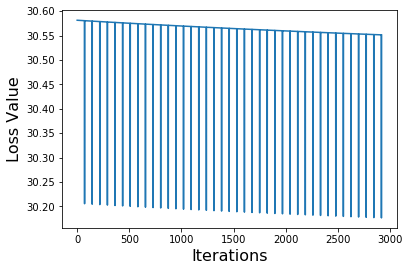

In [12]:
loss_list = []

image_placeholder = tf.placeholder(tf.float32, shape=(None, n_input))
label_placeholder = tf.placeholder(tf.float32, shape=(None, n_classes))

weights = tf.Variable(tf.random_normal([n_input, n_classes]))
biases = tf.Variable(tf.random_normal([n_classes]))
label_pred = tf.nn.relu6(tf.matmul(image_placeholder, weights)+biases)

loss = tf.reduce_mean(tf.square(label_pred - label_placeholder)+
                      beta*tf.nn.l2_loss(weights)
                     )

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate_single).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    training_final, testing_final = data_final_less_equal_images.sample(frac=0.80), data_final_less_equal_images.sample(frac=0.20)
    image_train_batch, label_train_batch = np.array_split(training_final.iloc[:,0:800], num_batch_training), np.array_split(training_final.iloc[:,800:], num_batch_training)
    print ("Started Training...")
    for i in range(epoch_size):
        for j in range(num_batch_training):
            _, loss_value = sess.run((optimizer, loss), feed_dict = {image_placeholder: image_train_batch[j],
                                                                     label_placeholder: label_train_batch[j]})
            correct_prediction = tf.equal(tf.argmax(label_pred, 1), tf.argmax(label_placeholder, 1))
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
            loss_list.append(loss_value)
        if i % 4 == 0:
            print ('Loss Value: ', loss_value.mean())
            print ('Accuracy on Test Set after {0} Epochs: '.format(i), accuracy.eval(feed_dict = {image_placeholder: testing_final.iloc[:,0:800],
                                                                                                   label_placeholder: testing_final.iloc[:,800:]}))
    print ('Done Testing')
    fig = plt.figure()
    plt.plot(loss_list)
    plt.xlabel('Iterations', fontsize=16)
    plt.ylabel('Loss Value', fontsize=16)
    fig.savefig('SingleLayer_Loss.jpg')

# Multi Layer NN with Hidden Layers

In [ ]:
loss_list = []

image_placeholder = tf.placeholder(tf.float32, shape=[None, n_input])
label_placeholder = tf.placeholder(tf.float32, shape=[None, n_classes])

weights = {
           'hidden_layer_1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
           'hidden_layer_2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
           'hidden_layer_3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
           'hidden_layer_4': tf.Variable(tf.random_normal([n_hidden_3, n_hidden_4])),
           'hidden_layer_5': tf.Variable(tf.random_normal([n_hidden_4, n_hidden_5])),
           'hidden_layer_6': tf.Variable(tf.random_normal([n_hidden_5, n_hidden_6])),
           'hidden_layer_7': tf.Variable(tf.random_normal([n_hidden_6, n_hidden_7])),
           'output_layer'  : tf.Variable(tf.random_normal([n_hidden_7, n_classes]))
          }
biases =  {
           'bias_1': tf.Variable(tf.random_normal([n_hidden_1])),
           'bias_2': tf.Variable(tf.random_normal([n_hidden_2])),
           'bias_3': tf.Variable(tf.random_normal([n_hidden_3])),
           'bias_4': tf.Variable(tf.random_normal([n_hidden_4])),
           'bias_5': tf.Variable(tf.random_normal([n_hidden_5])),
           'bias_6': tf.Variable(tf.random_normal([n_hidden_6])),
           'bias_7': tf.Variable(tf.random_normal([n_hidden_7])),
           'output_layer': tf.Variable(tf.random_normal([n_classes]))
          }

layer_1 = tf.add(tf.matmul(image_placeholder, weights['hidden_layer_1']), biases['bias_1'])
layer_1 = tf.nn.sigmoid(layer_1)
layer_2 = tf.add(tf.matmul(layer_1, weights['hidden_layer_2']), biases['bias_2'])
layer_2 = tf.nn.sigmoid(layer_2)
layer_3 = tf.add(tf.matmul(layer_2, weights['hidden_layer_3']), biases['bias_3'])
layer_3 = tf.nn.sigmoid(layer_3)
layer_4 = tf.add(tf.matmul(layer_3, weights['hidden_layer_4']), biases['bias_4'])
layer_4 = tf.nn.sigmoid(layer_4)
layer_5 = tf.add(tf.matmul(layer_4, weights['hidden_layer_5']), biases['bias_5'])
layer_5 = tf.nn.sigmoid(layer_5)
layer_6 = tf.add(tf.matmul(layer_5, weights['hidden_layer_6']), biases['bias_6'])
layer_6 = tf.nn.sigmoid(layer_6)
layer_7 = tf.add(tf.matmul(layer_6, weights['hidden_layer_7']), biases['bias_7'])
layer_7 = tf.nn.sigmoid(layer_7)
label_prediction = tf.add((tf.matmul(layer_7, weights['output_layer'])), biases['output_layer'])
label_prediction = tf.nn.sigmoid(label_prediction)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=label_prediction, labels=label_placeholder)+
                      beta*tf.nn.l2_loss(weights['hidden_layer_1'])+
                      beta*tf.nn.l2_loss(weights['hidden_layer_2'])+
                      beta*tf.nn.l2_loss(weights['hidden_layer_3'])+
                      beta*tf.nn.l2_loss(weights['hidden_layer_4'])+
                      beta*tf.nn.l2_loss(weights['hidden_layer_5'])+
                      beta*tf.nn.l2_loss(weights['hidden_layer_6'])+
                      beta*tf.nn.l2_loss(weights['hidden_layer_7'])+
                      beta*tf.nn.l2_loss(weights['output_layer'])
                     )

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate_multi).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    training_final, testing_final = data_final_less_equal_images.sample(frac=0.80), data_final_less_equal_images.sample(frac=0.20)
    image_train_batch, label_train_batch = np.array_split(training_final.iloc[:,0:800], num_batch_training), np.array_split(training_final.iloc[:,800:], num_batch_training)
    print ("Started Training...")
    for i in range(epoch_size):
        for j in range(num_batch_training):
            _, loss_value = sess.run((optimizer, loss), feed_dict = {image_placeholder: image_train_batch[j],
                                                                     label_placeholder: label_train_batch[j]})
            correct_prediction = tf.equal(tf.argmax(label_prediction, 1), tf.argmax(label_placeholder, 1))
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
            loss_list.append(loss_value)
        if i % 5 == 0:
            print ('Loss Value: ', loss_value.mean())
            print ('Accuracy on Test Set after {0} Epochs: '.format(i), accuracy.eval(feed_dict = {image_placeholder: testing_final.iloc[:,0:800],
                                                                                                   label_placeholder: testing_final.iloc[:,800:]}))
    print ('Done Testing')
    fig = plt.figure()
    plt.plot(loss_list)
    plt.xlabel('Iterations', fontsize=16)
    plt.ylabel('Loss Value', fontsize=16)
    fig.savefig('MultiLayer_Loss.jpg')

Started Training...
Loss Value:  10.6718
Accuracy on Test Set after 0 Epochs:  0.795222
Loss Value:  1.42645
Accuracy on Test Set after 5 Epochs:  0.515358
Loss Value:  1.04687
Accuracy on Test Set after 10 Epochs:  0.515358
Loss Value:  0.922237
Accuracy on Test Set after 15 Epochs:  0.515358
Loss Value:  0.860304
Accuracy on Test Set after 20 Epochs:  0.515358
Loss Value:  0.821693
Accuracy on Test Set after 25 Epochs:  0.515358
Loss Value:  0.793812
Accuracy on Test Set after 30 Epochs:  0.515358


# Convolutional Neural Network

Started Training...
Loss Value:  0.633989
Accuracy on Test Set after 0 Epochs:  0.865188
Loss Value:  0.486487
Accuracy on Test Set after 4 Epochs:  0.889078
Loss Value:  0.448181
Accuracy on Test Set after 8 Epochs:  0.854949
Loss Value:  0.460243
Accuracy on Test Set after 12 Epochs:  0.866894
Loss Value:  0.459
Accuracy on Test Set after 16 Epochs:  0.866894
Loss Value:  0.435681
Accuracy on Test Set after 20 Epochs:  0.883959
Loss Value:  0.412542
Accuracy on Test Set after 24 Epochs:  0.872014
Loss Value:  0.40533
Accuracy on Test Set after 28 Epochs:  0.875427
Loss Value:  0.416711
Accuracy on Test Set after 32 Epochs:  0.887372
Loss Value:  0.427462
Accuracy on Test Set after 36 Epochs:  0.885666
Done Testing


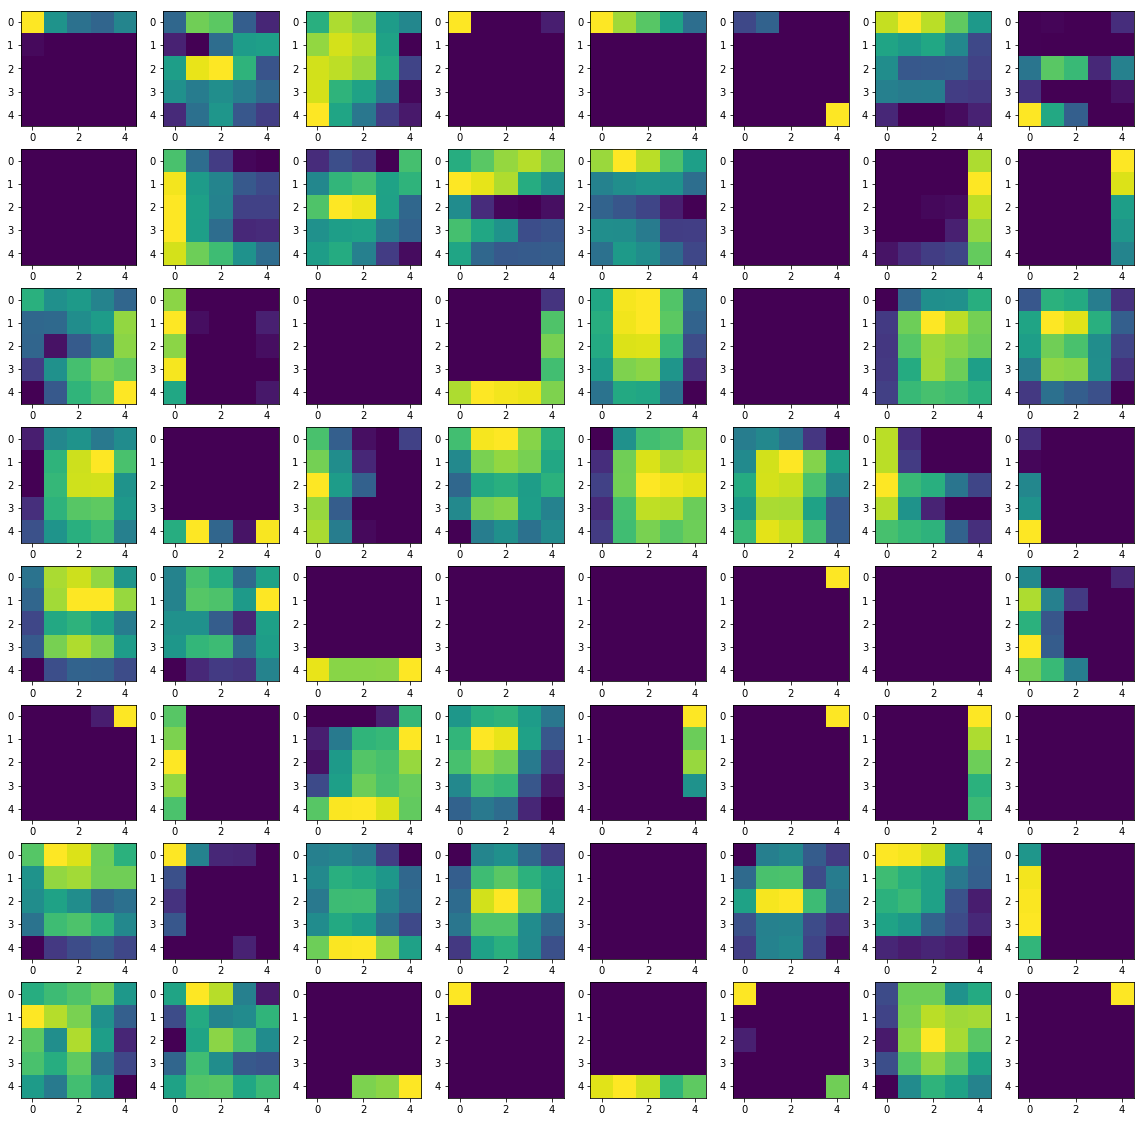

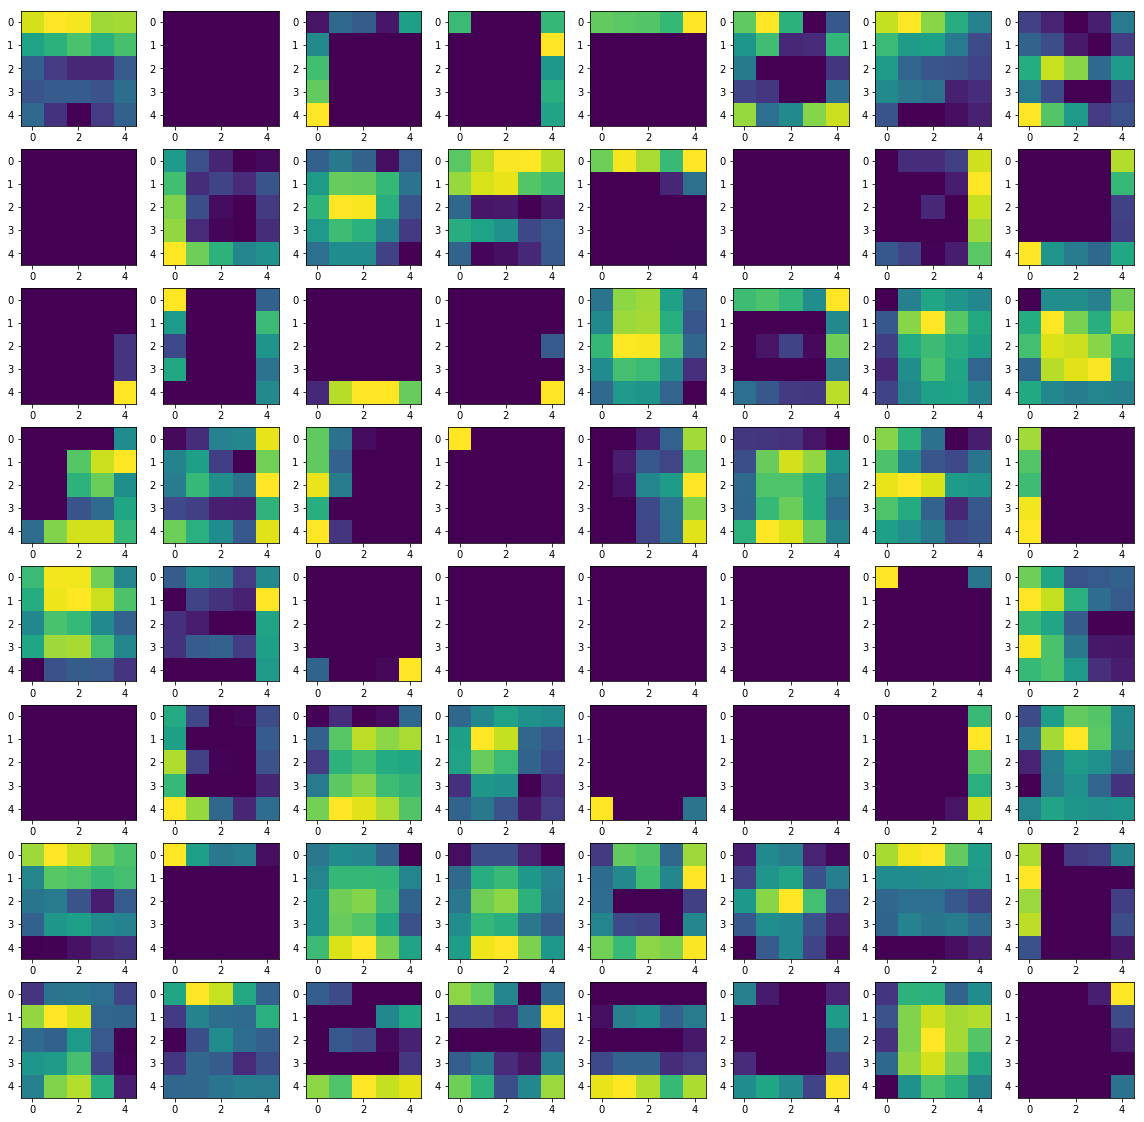

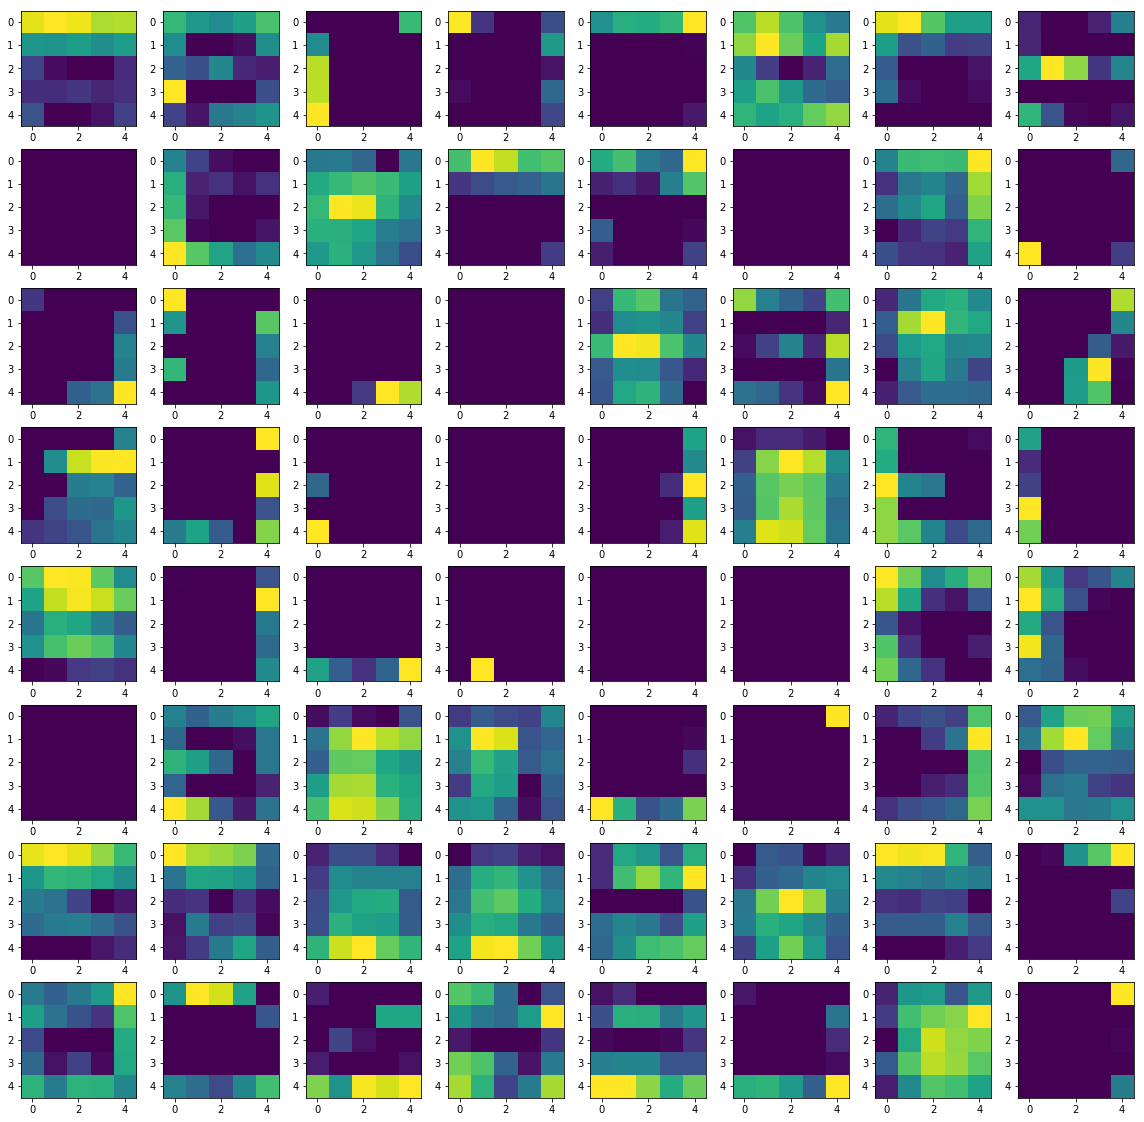

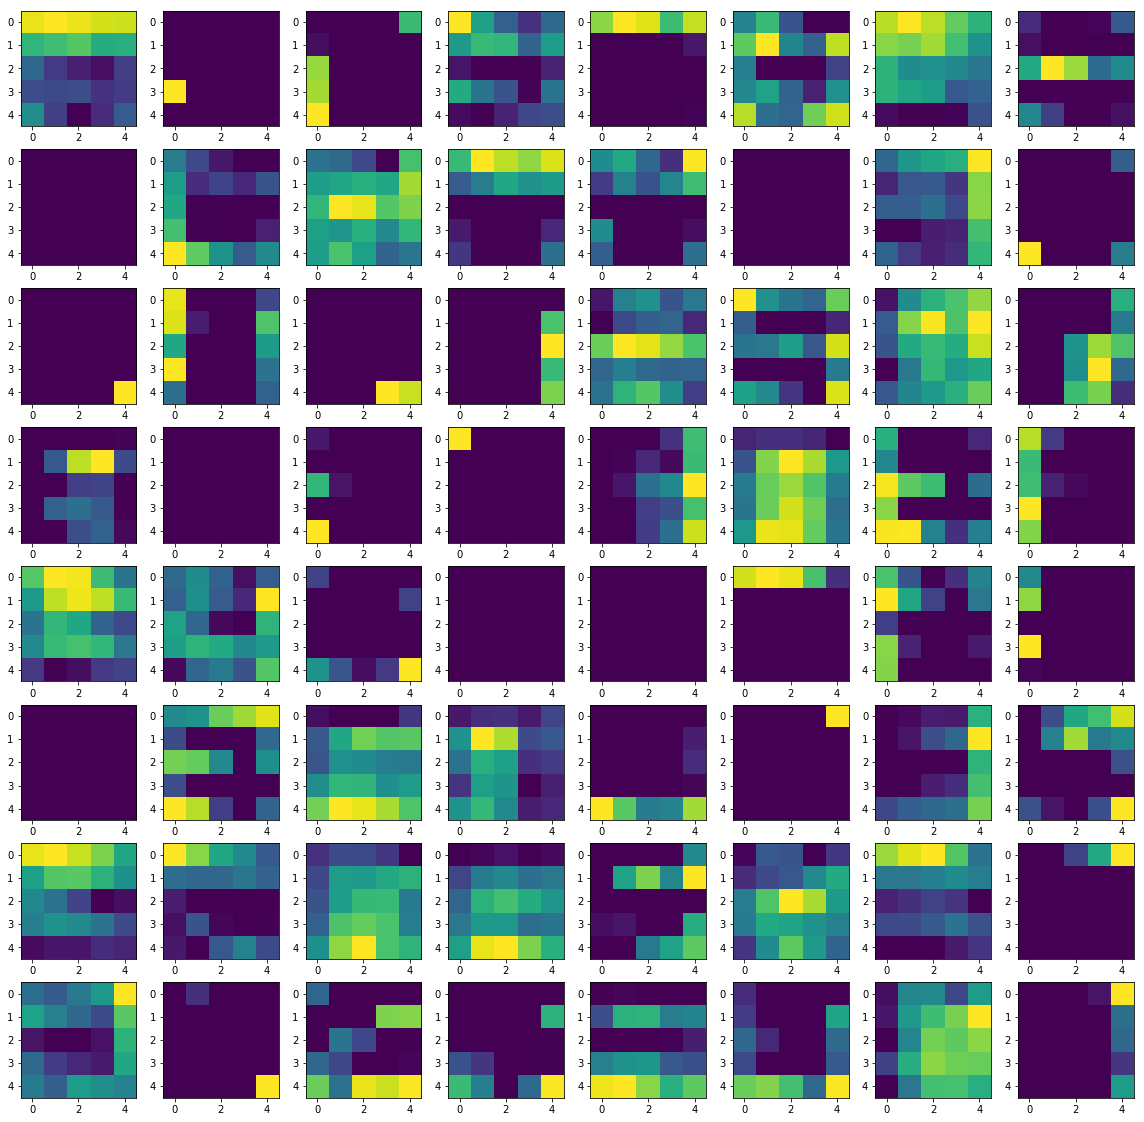

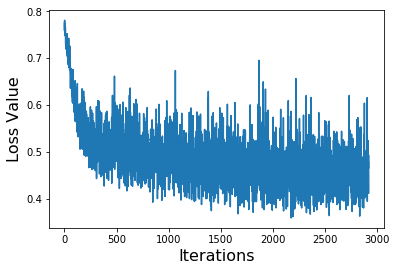

In [11]:
loss_list = []

image_placeholder = tf.placeholder(tf.float32, shape=[None, n_input])
label_placeholder = tf.placeholder(tf.float32, shape=[None, n_classes])

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.05)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.05, shape=shape)
    return tf.Variable(initial)

def conv2d(image, weights):
    return tf.nn.conv2d(image, weights, strides=[1, 1, 1, 1], padding='SAME')

def max_pool2d(image):
    return tf.nn.max_pool(image, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

weights = {
          'weights_conv1': weight_variable([3, 3, 1, 16]),
          'weights_conv2': weight_variable([3, 3, 16, 32]),
          'weights_conv3': weight_variable([3, 3, 32, 64]),
          'weights_fc_1' : weight_variable([5 * 5 * 64, 512]),
          'weights_fc_2' : weight_variable([512, 128]),
          'weights_fc_3' : weight_variable([128, 32]),
          'output_layer' : weight_variable([32, n_classes])
          }
biases =  {
          'biases_conv1' : bias_variable([16]),
          'biases_conv2' : bias_variable([32]),
          'biases_conv3' : bias_variable([64]),
          'biases_fc_1'  : bias_variable([512]),
          'biases_fc_2'  : bias_variable([128]),
          'biases_fc_3'  : bias_variable([32]),
          'output_layer' : bias_variable([n_classes])
          }

image = tf.reshape(image_placeholder, shape=[-1, 40, 20, 1])
image = tf.image.resize_bilinear(image, size=[40, 40])

convolution_1 = tf.nn.relu(conv2d(image, weights['weights_conv1']) + biases['biases_conv1'])
convolution_1 = max_pool2d(convolution_1)
    
convolution_2 = tf.nn.relu(conv2d(convolution_1, weights['weights_conv2']) + biases['biases_conv2'])
convolution_2 = max_pool2d(convolution_2)

convolution_3 = tf.nn.relu(conv2d(convolution_2, weights['weights_conv3']) + biases['biases_conv3'])
convolution_3 = max_pool2d(convolution_3)

fully_connected_1 = tf.reshape(convolution_3, [-1, 5 * 5 * 64])
fully_connected_1 = tf.nn.relu6(tf.matmul(fully_connected_1, weights['weights_fc_1']) + biases['biases_fc_1'])

fully_connected_2 = tf.nn.relu6(tf.matmul(fully_connected_1, weights['weights_fc_2']) + biases['biases_fc_2'])

keep_prob = tf.placeholder(tf.float32)
fully_connected_2 = tf.nn.dropout(fully_connected_2, keep_prob=keep_prob)

fully_connected_3 = tf.nn.relu6(tf.matmul(fully_connected_2, weights['weights_fc_3']) + biases['biases_fc_3'])

output = tf.nn.softmax(tf.matmul(fully_connected_3, weights['output_layer']) + biases['output_layer']) 

loss = tf.reduce_mean(
                      tf.nn.softmax_cross_entropy_with_logits(logits=output, labels=label_placeholder)+
                      beta*tf.nn.l2_loss(weights['weights_conv1'])+
                      beta*tf.nn.l2_loss(weights['weights_conv2'])+
                      beta*tf.nn.l2_loss(weights['weights_conv3'])+
                      beta*tf.nn.l2_loss(weights['weights_fc_1'])+
                      beta*tf.nn.l2_loss(weights['weights_fc_2'])+
                      beta*tf.nn.l2_loss(weights['weights_fc_3'])+
                      beta*tf.nn.l2_loss(weights['output_layer'])
                     )

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate_conv).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    training_final, testing_final = data_final_less_equal_images.sample(frac=0.80), data_final_less_equal_images.sample(frac=0.20)
    image_train_batch, label_train_batch = np.array_split(training_final.iloc[:,0:800], num_batch_training), np.array_split(training_final.iloc[:,800:], num_batch_training)
    print ("Started Training...")   
    for i in range(epoch_size):
        for j in range(num_batch_training):
            convolution_filters = sess.run(convolution_3, feed_dict = {image_placeholder: image_train_batch[j],
                                                                       label_placeholder: label_train_batch[j]})
            _, loss_value = sess.run((optimizer, loss), feed_dict = {image_placeholder: image_train_batch[j],
                                                                     label_placeholder: label_train_batch[j],
                                                                     keep_prob: 0.9})
            
            if (i%10 == 0) and j==0:
                fig, axs = plt.subplots(8, 8, figsize=(20, 20), facecolor='w', edgecolor='k')
                axs = axs.ravel()
                for k in range(filter_number):
                    axs[k].imshow(convolution_filters[0, :, :, k])
                fig.savefig('Final Convolution Weight Filters.jpg')

            correct_prediction = tf.equal(tf.argmax(output, 1), tf.argmax(label_placeholder, 1))
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
            loss_list.append(loss_value)
        if i % 4 == 0:
            print ('Loss Value: ', loss_value.mean())
            print ('Accuracy on Test Set after {0} Epochs: '.format(i), accuracy.eval(feed_dict = {image_placeholder: testing_final.iloc[:,0:800],
                                                                                                   label_placeholder: testing_final.iloc[:,800:],
                                                                                                   keep_prob: 1.0}))

    print ('Done Testing')
    fig = plt.figure()
    plt.plot(loss_list)
    plt.xlabel('Iterations', fontsize=16)
    plt.ylabel('Loss Value', fontsize=16)
    fig.savefig('Convolution_Loss.jpg')

# Ensemble Model of Convolution Neural Networks

Convolution Neural Network 0: 
Started Training...
Loss Value:  0.628377
Accuracy on Test Set after 0 Epochs:  0.831058
Loss Value:  0.528615
Accuracy on Test Set after 5 Epochs:  0.849829
Loss Value:  0.541879
Accuracy on Test Set after 10 Epochs:  0.807167
Loss Value:  0.494973
Accuracy on Test Set after 15 Epochs:  0.885666
Done Testing


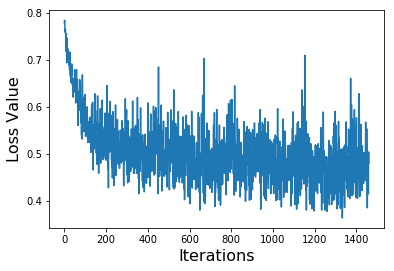

Convolution Neural Network 1: 
Started Training...
Loss Value:  0.48045
Accuracy on Test Set after 0 Epochs:  0.872014
Loss Value:  0.564882
Accuracy on Test Set after 5 Epochs:  0.837884
Loss Value:  0.492698
Accuracy on Test Set after 10 Epochs:  0.87884
Loss Value:  0.478704
Accuracy on Test Set after 15 Epochs:  0.883959
Done Testing


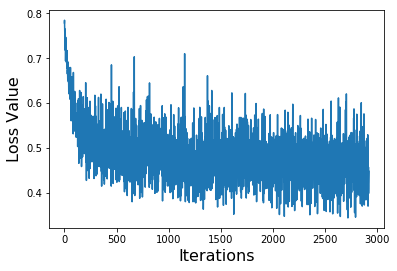

Convolution Neural Network 2: 
Started Training...
Loss Value:  0.449625
Accuracy on Test Set after 0 Epochs:  0.90785
Loss Value:  0.475988
Accuracy on Test Set after 5 Epochs:  0.889078
Loss Value:  0.456685
Accuracy on Test Set after 10 Epochs:  0.883959
Loss Value:  0.470432
Accuracy on Test Set after 15 Epochs:  0.901024
Done Testing


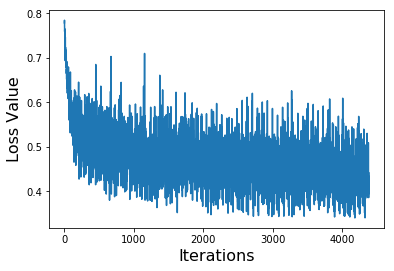

Convolution Neural Network 3: 
Started Training...
Loss Value:  0.439677
Accuracy on Test Set after 0 Epochs:  0.889078
Loss Value:  0.43581
Accuracy on Test Set after 5 Epochs:  0.916382
Loss Value:  0.474255
Accuracy on Test Set after 10 Epochs:  0.90785
Loss Value:  0.453964
Accuracy on Test Set after 15 Epochs:  0.924915
Done Testing


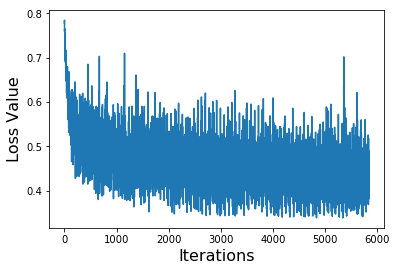

Convolution Neural Network 4: 
Started Training...
Loss Value:  0.448409
Accuracy on Test Set after 0 Epochs:  0.911263
Loss Value:  0.458123
Accuracy on Test Set after 5 Epochs:  0.904437
Loss Value:  0.454145
Accuracy on Test Set after 10 Epochs:  0.906143
Loss Value:  0.437543
Accuracy on Test Set after 15 Epochs:  0.90273
Done Testing


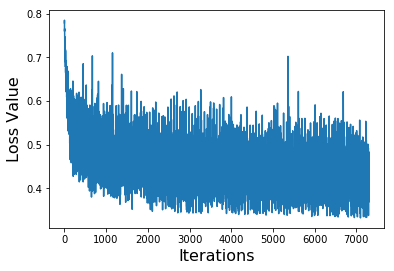

Ensemble Learning: 
Averaging all the Predictors in the Ensemble Model and Checking the Accuracy with True Label
Confusion Matrix of the Ensemble Predictions and True Label
Accuracy of the Ensemble Predictions and True Label


In [10]:
loss_list = []

predicted_label = []

image_placeholder = tf.placeholder(tf.float32, shape=[None, n_input])
label_placeholder = tf.placeholder(tf.float32, shape=[None, n_classes])

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.05)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.05, shape=shape)
    return tf.Variable(initial)

def conv2d(image, weights):
    return tf.nn.conv2d(image, weights, strides=[1, 1, 1, 1], padding='SAME')

def max_pool2d(image):
    return tf.nn.max_pool(image, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

weights = {
          'weights_conv1': weight_variable([3, 3, 1, 16]),
          'weights_conv2': weight_variable([3, 3, 16, 32]),
          'weights_conv3': weight_variable([3, 3, 32, 64]),
          'weights_fc_1' : weight_variable([5 * 5 * 64, 512]),
          'weights_fc_2' : weight_variable([512, 128]),
          'weights_fc_3' : weight_variable([128, 16]),
          'output_layer' : weight_variable([16, n_classes])
          }
biases =  {
          'biases_conv1' : bias_variable([16]),
          'biases_conv2' : bias_variable([32]),
          'biases_conv3' : bias_variable([64]),
          'biases_fc_1'  : bias_variable([512]),
          'biases_fc_2'  : bias_variable([128]),
          'biases_fc_3'  : bias_variable([16]),
          'output_layer' : bias_variable([n_classes])
          }

image = tf.reshape(image_placeholder, shape=[-1, 40, 20, 1])
image = tf.image.resize_bilinear(image, size=[40, 40])

convolution_1 = tf.nn.relu(conv2d(image, weights['weights_conv1']) + biases['biases_conv1'])
convolution_1 = max_pool2d(convolution_1)
    
convolution_2 = tf.nn.relu(conv2d(convolution_1, weights['weights_conv2']) + biases['biases_conv2'])
convolution_2 = max_pool2d(convolution_2)

convolution_3 = tf.nn.relu(conv2d(convolution_2, weights['weights_conv3']) + biases['biases_conv3'])
convolution_3 = max_pool2d(convolution_3)

fully_connected_1 = tf.reshape(convolution_3, [-1, 5 * 5 * 64])
fully_connected_1 = tf.nn.relu6(tf.matmul(fully_connected_1, weights['weights_fc_1']) + biases['biases_fc_1'])

fully_connected_2 = tf.nn.relu6(tf.matmul(fully_connected_1, weights['weights_fc_2']) + biases['biases_fc_2'])

keep_prob = tf.placeholder(tf.float32)
fully_connected_2 = tf.nn.dropout(fully_connected_2, keep_prob=keep_prob)

fully_connected_3 = tf.nn.relu6(tf.matmul(fully_connected_2, weights['weights_fc_3']) + biases['biases_fc_3'])

output = tf.nn.softmax(tf.matmul(fully_connected_3, weights['output_layer']) + biases['output_layer']) 

loss = tf.reduce_mean(
                      tf.nn.softmax_cross_entropy_with_logits(logits=output, labels=label_placeholder)+
                      beta*tf.nn.l2_loss(weights['weights_conv1'])+
                      beta*tf.nn.l2_loss(weights['weights_conv2'])+
                      beta*tf.nn.l2_loss(weights['weights_conv3'])+
                      beta*tf.nn.l2_loss(weights['weights_fc_1'])+
                      beta*tf.nn.l2_loss(weights['weights_fc_2'])+
                      beta*tf.nn.l2_loss(weights['weights_fc_3'])+
                      beta*tf.nn.l2_loss(weights['output_layer'])
                     )

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate_conv).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    training_final, testing_final = data_final_less_equal_images.sample(frac=0.80), data_final_less_equal_images.sample(frac=0.20)
    image_train_batch, label_train_batch = np.array_split(training_final.iloc[:,0:800], num_batch_training), np.array_split(training_final.iloc[:,800:], num_batch_training)
    for i in range(num_networks):
        print ('Convolution Neural Network {0}: '.format(i))
        print ("Started Training...")   
        for j in range(epoch_size):
            for k in range(num_batch_training):
                _, loss_value = sess.run((optimizer, loss), feed_dict = {image_placeholder: image_train_batch[k],
                                                                         label_placeholder: label_train_batch[k],
                                                                         keep_prob: 0.9})
                correct_prediction = tf.equal(tf.argmax(output, 1), tf.argmax(label_placeholder, 1))
                accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
                loss_list.append(loss_value)
            if j % 5 == 0:
                print ('Loss Value: ', loss_value.mean())
                pred_label = sess.run(output, feed_dict = {image_placeholder: testing_final.iloc[:,0:800],
                                                           label_placeholder: testing_final.iloc[:,800:],
                                                           keep_prob: 1.0})
                predicted_label.append(pred_label)
                print ('Accuracy on Test Set after {0} Epochs: '.format(j), accuracy.eval(feed_dict = {image_placeholder: testing_final.iloc[:,0:800],
                                                                                                       label_placeholder: testing_final.iloc[:,800:],
                                                                                                       keep_prob: 1.0}))
        print ('Done Testing')
        fig = plt.figure()
        plt.plot(loss_list)
        plt.xlabel('Iterations', fontsize=16)
        plt.ylabel('Loss Value', fontsize=16)
        plt.show()
        
    print("Ensemble Learning: ")    
    print("Averaging all the Predictors in the Ensemble Model and Checking the Accuracy with True Label")    
    ensemble_pred_labels = np.mean(predicted_label, axis=0)
    ensemble_class_prediction = np.argmax(ensemble_pred_labels, axis=1)
    print ("Confusion Matrix of the Ensemble Predictions and True Label")
    print (confusion_matrix(testing_final.iloc[:,801:], ensemble_class_prediction))
    print ("Accuracy of the Ensemble Predictions and True Label")
    print (accuracy_score(testing_final.iloc[:,801:], ensemble_class_prediction))

In [12]:
    print ("Confusion Matrix of the Ensemble Predictions and True Label")
    print (confusion_matrix(testing_final.iloc[:,801:], ensemble_class_prediction))
    print ("Accuracy of the Ensemble Predictions and True Label")
    print (accuracy_score(testing_final.iloc[:,801:], ensemble_class_prediction))

Confusion Matrix of the Ensemble Predictions and True Label
[[252  39]
 [ 17 278]]
Accuracy of the Ensemble Predictions and True Label
0.904436860068


# Clustering

In [79]:
training_list = pd.read_table(training_list, sep = ' ', engine = 'python', header=None, index_col=False) 
training_list.columns = ['Series No.', 'mz_bin', 'rt_bin', 'mz', 'rt', 'Int_max_of_bb', 'bb_w_ratio', 'bb_h_ratio']
training_list = training_list.drop('Series No.', axis=1, inplace=False)
print (pd.DataFrame.cov(training_list))
print ("By looking at the Variance - Covariance Matrix we see that bb_w_ration and bb_h_ratio have very low variance so it's quite safe to drop them")
training_list = training_list.drop(['bb_w_ratio', 'bb_h_ratio'], axis=1, inplace=False)
training_final_list, testing_final_list = training_list.sample(frac=0.80), training_list.sample(frac=0.20)

                     mz_bin       rt_bin            mz           rt  \
mz_bin         1.036098e+04    -1.641033  1.036096e+04    -1.382256   
rt_bin        -1.641033e+00    95.121610 -1.644400e+00    95.105322   
mz             1.036096e+04    -1.644400  1.036094e+04    -1.385622   
rt            -1.382256e+00    95.105322 -1.385622e+00    95.089902   
Int_max_of_bb -2.414101e+06 -5912.161518 -2.414094e+06 -5828.102993   
bb_w_ratio     7.067878e+00     0.103221  7.067858e+00     0.103421   
bb_h_ratio    -2.119423e+00     0.055803 -2.119415e+00     0.056140   

               Int_max_of_bb   bb_w_ratio  bb_h_ratio  
mz_bin         -2.414101e+06     7.067878   -2.119423  
rt_bin         -5.912162e+03     0.103221    0.055803  
mz             -2.414094e+06     7.067858   -2.119415  
rt             -5.828103e+03     0.103421    0.056140  
Int_max_of_bb   5.915058e+10 -8216.330862   51.013876  
bb_w_ratio     -8.216331e+03     0.014117   -0.000484  
bb_h_ratio      5.101388e+01    -0.0004